* tokenization - character level used in GPT (andrew karparty)
* strings to tokens

* Tokenization is at the `heart of much weirdness` of LLMs.
* 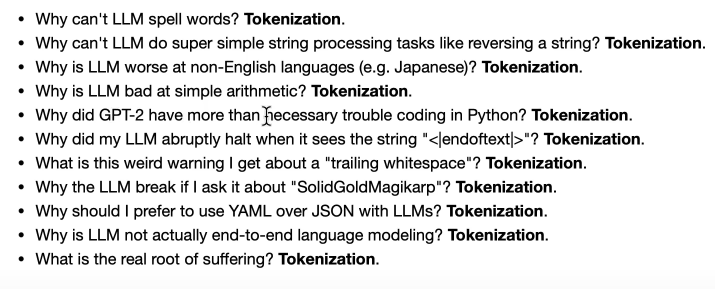
* https://tiktokenizer.vercel.app/
* There's ambiguity in converting numbers into tokens (127 + 677 = 804 = `127` ` +` ` 6` `77 =` ` 8` `04`) bad in arthematic operations
* 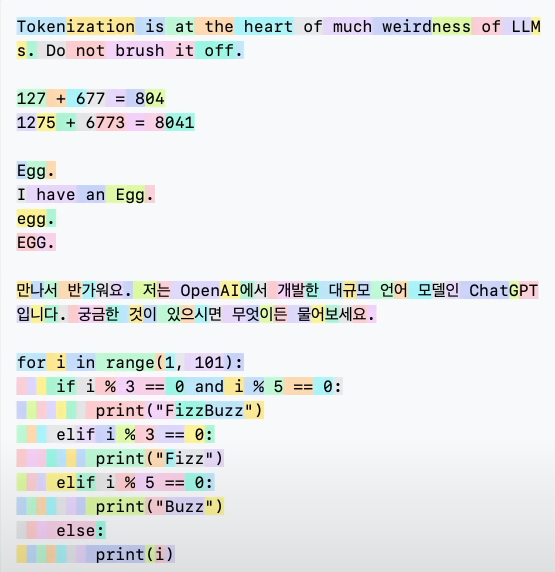
* context length increases if tokenization is not correctly done
* spaces also considered as token, this issue we can see in programming in the form of indentation 
* Token count changes from model to model for the exact same string.
* In gpt4 handling of white space has improved a lot. 

* Unicode code point, a text encoding standard - 149813 characters
* 3 types of encoding - UTF-8, UTF-16, UTF-32
* unicode to binary 
* https://www.reedbeta.com/blog/programmers-intro-to-unicode/
* 

In [3]:
name = 'sneha vardhan kandregula'

In [4]:
[ord(i) for i in name]

[115,
 110,
 101,
 104,
 97,
 32,
 118,
 97,
 114,
 100,
 104,
 97,
 110,
 32,
 107,
 97,
 110,
 100,
 114,
 101,
 103,
 117,
 108,
 97]

In [5]:
list(name.encode("utf-32"))

[255,
 254,
 0,
 0,
 115,
 0,
 0,
 0,
 110,
 0,
 0,
 0,
 101,
 0,
 0,
 0,
 104,
 0,
 0,
 0,
 97,
 0,
 0,
 0,
 32,
 0,
 0,
 0,
 118,
 0,
 0,
 0,
 97,
 0,
 0,
 0,
 114,
 0,
 0,
 0,
 100,
 0,
 0,
 0,
 104,
 0,
 0,
 0,
 97,
 0,
 0,
 0,
 110,
 0,
 0,
 0,
 32,
 0,
 0,
 0,
 107,
 0,
 0,
 0,
 97,
 0,
 0,
 0,
 110,
 0,
 0,
 0,
 100,
 0,
 0,
 0,
 114,
 0,
 0,
 0,
 101,
 0,
 0,
 0,
 103,
 0,
 0,
 0,
 117,
 0,
 0,
 0,
 108,
 0,
 0,
 0,
 97,
 0,
 0,
 0]

* A lot of zeros for utf-16/32, we prefer utf-8

### Byte-pair encoding
* 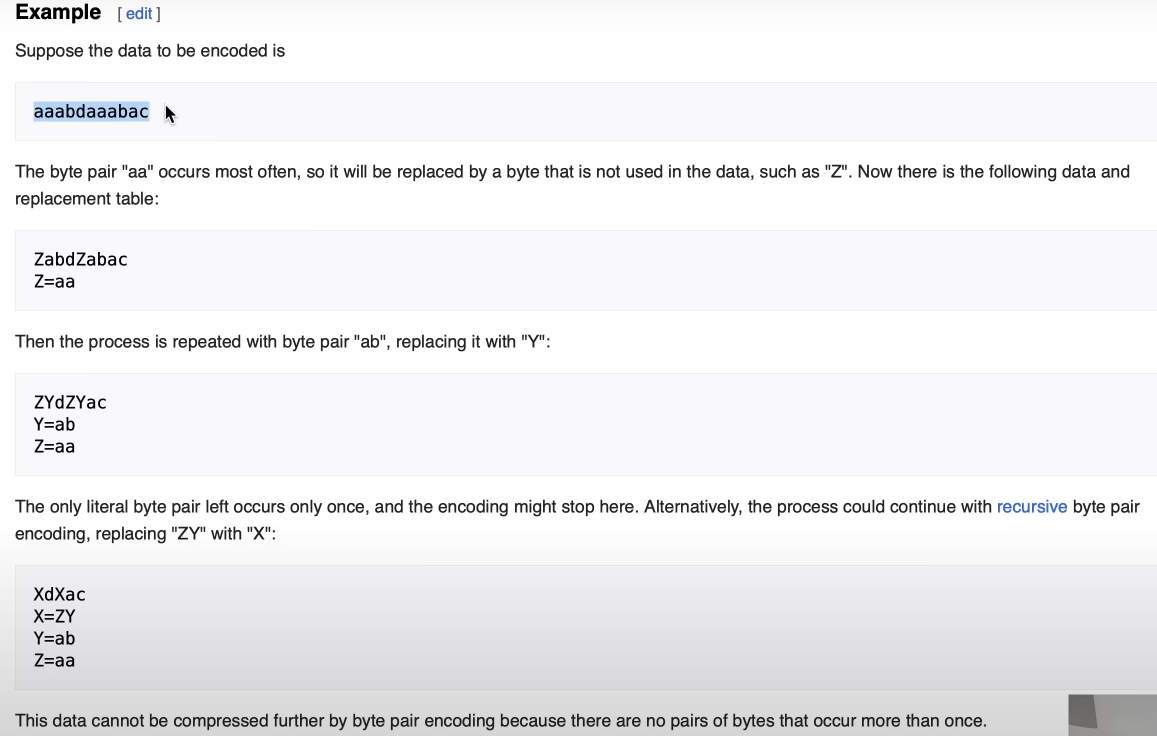


In [10]:
text = " This operation is readily available in all deep learning frameworks. It is differentiable and its gradient never vanishes, all of which are desirable properties in a model. Note though, the attention mechanism introduced above is not the only option."
tokens = text.encode('utf-8')
tokens = list(map(int, tokens))
print('-----------------------')
print(text)
print("length:", len(text))
print('-----------------------')
print(tokens)
print("length:", len(tokens)) 

-----------------------
 This operation is readily available in all deep learning frameworks. It is differentiable and its gradient never vanishes, all of which are desirable properties in a model. Note though, the attention mechanism introduced above is not the only option.
length: 251
-----------------------
[32, 84, 104, 105, 115, 32, 111, 112, 101, 114, 97, 116, 105, 111, 110, 32, 105, 115, 32, 114, 101, 97, 100, 105, 108, 121, 32, 97, 118, 97, 105, 108, 97, 98, 108, 101, 32, 105, 110, 32, 97, 108, 108, 32, 100, 101, 101, 112, 32, 108, 101, 97, 114, 110, 105, 110, 103, 32, 102, 114, 97, 109, 101, 119, 111, 114, 107, 115, 46, 32, 73, 116, 32, 105, 115, 32, 100, 105, 102, 102, 101, 114, 101, 110, 116, 105, 97, 98, 108, 101, 32, 97, 110, 100, 32, 105, 116, 115, 32, 103, 114, 97, 100, 105, 101, 110, 116, 32, 110, 101, 118, 101, 114, 32, 118, 97, 110, 105, 115, 104, 101, 115, 44, 32, 97, 108, 108, 32, 111, 102, 32, 119, 104, 105, 99, 104, 32, 97, 114, 101, 32, 100, 101, 115, 105, 114, 9

In [12]:
def get_stats(ids):
    count={}
    for pair in zip(ids, ids[1:]):
        count[pair] = count.get(pair, 0) + 1
    return count

stat = get_stats(tokens)
print(stat)

{(32, 84): 1, (84, 104): 1, (104, 105): 2, (105, 115): 6, (115, 32): 6, (32, 111): 4, (111, 112): 3, (112, 101): 2, (101, 114): 4, (114, 97): 4, (97, 116): 2, (116, 105): 5, (105, 111): 3, (111, 110): 4, (110, 32): 4, (32, 105): 7, (32, 114): 1, (114, 101): 3, (101, 97): 2, (97, 100): 2, (100, 105): 3, (105, 108): 2, (108, 121): 2, (121, 32): 2, (32, 97): 8, (97, 118): 1, (118, 97): 2, (97, 105): 1, (108, 97): 1, (97, 98): 4, (98, 108): 3, (108, 101): 4, (101, 32): 8, (105, 110): 4, (97, 108): 2, (108, 108): 2, (108, 32): 2, (32, 100): 3, (100, 101): 3, (101, 101): 1, (101, 112): 1, (112, 32): 1, (32, 108): 1, (97, 114): 2, (114, 110): 1, (110, 105): 3, (110, 103): 1, (103, 32): 1, (32, 102): 1, (102, 114): 1, (97, 109): 1, (109, 101): 2, (101, 119): 1, (119, 111): 1, (111, 114): 1, (114, 107): 1, (107, 115): 1, (115, 46): 1, (46, 32): 2, (32, 73): 1, (73, 116): 1, (116, 32): 3, (105, 102): 1, (102, 102): 1, (102, 101): 1, (101, 110): 3, (110, 116): 4, (105, 97): 1, (97, 110): 3, (110,

In [15]:
print(sorted(((v,k) for k,v in stat.items()), reverse = True))

[(8, (101, 32)), (8, (32, 97)), (7, (32, 105)), (6, (115, 32)), (6, (105, 115)), (5, (116, 105)), (4, (114, 97)), (4, (111, 110)), (4, (110, 116)), (4, (110, 32)), (4, (108, 101)), (4, (105, 110)), (4, (101, 114)), (4, (97, 98)), (4, (32, 111)), (3, (116, 104)), (3, (116, 32)), (3, (114, 101)), (3, (111, 112)), (3, (110, 105)), (3, (105, 111)), (3, (104, 101)), (3, (101, 115)), (3, (101, 110)), (3, (100, 105)), (3, (100, 101)), (3, (98, 108)), (3, (97, 110)), (3, (32, 116)), (3, (32, 100)), (2, (121, 32)), (2, (118, 101)), (2, (118, 97)), (2, (116, 101)), (2, (114, 111)), (2, (112, 101)), (2, (111, 116)), (2, (111, 100)), (2, (109, 101)), (2, (108, 121)), (2, (108, 108)), (2, (108, 32)), (2, (105, 108)), (2, (105, 101)), (2, (104, 105)), (2, (101, 97)), (2, (100, 32)), (2, (99, 104)), (2, (97, 116)), (2, (97, 114)), (2, (97, 108)), (2, (97, 100)), (2, (46, 32)), (2, (44, 32)), (2, (32, 110)), (2, (32, 109)), (1, (119, 111)), (1, (119, 104)), (1, (117, 103)), (1, (117, 99)), (1, (116, 1

In [17]:
chr(101), chr(32)

('e', ' ')

##### Step 1: Most occuring replaced by 256

In [6]:
# making the training text longer to have more representative token statistics
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = """A Programmer‚Äôs Introduction to Unicode March 3, 2017 ¬∑ Coding ¬∑ 22 Comments  ÔºµÔΩéÔΩâÔΩÉÔΩèÔΩÑÔΩÖ! üÖ§üÖùüÖòüÖíüÖûüÖìüÖî‚ÄΩ üá∫\u200cüá≥\u200cüáÆ\u200cüá®\u200cüá¥\u200cüá©\u200cüá™! üòÑ The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to ‚Äúsupport Unicode‚Äù in our software (whatever that means‚Äîlike using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don‚Äôt blame programmers for still finding the whole thing mysterious, even 30 years after Unicode‚Äôs inception.  A few months ago, I got interested in Unicode and decided to spend some time learning more about it in detail. In this article, I‚Äôll give an introduction to it from a programmer‚Äôs point of view.  I‚Äôm going to focus on the character set and what‚Äôs involved in working with strings and files of Unicode text. However, in this article I‚Äôm not going to talk about fonts, text layout/shaping/rendering, or localization in detail‚Äîthose are separate issues, beyond my scope (and knowledge) here.  Diversity and Inherent Complexity The Unicode Codespace Codespace Allocation Scripts Usage Frequency Encodings UTF-8 UTF-16 Combining Marks Canonical Equivalence Normalization Forms Grapheme Clusters And More‚Ä¶ Diversity and Inherent Complexity As soon as you start to study Unicode, it becomes clear that it represents a large jump in complexity over character sets like ASCII that you may be more familiar with. It‚Äôs not just that Unicode contains a much larger number of characters, although that‚Äôs part of it. Unicode also has a great deal of internal structure, features, and special cases, making it much more than what one might expect a mere ‚Äúcharacter set‚Äù to be. We‚Äôll see some of that later in this article.  When confronting all this complexity, especially as an engineer, it‚Äôs hard not to find oneself asking, ‚ÄúWhy do we need all this? Is this really necessary? Couldn‚Äôt it be simplified?‚Äù  However, Unicode aims to faithfully represent the entire world‚Äôs writing systems. The Unicode Consortium‚Äôs stated goal is ‚Äúenabling people around the world to use computers in any language‚Äù. And as you might imagine, the diversity of written languages is immense! To date, Unicode supports 135 different scripts, covering some 1100 languages, and there‚Äôs still a long tail of over 100 unsupported scripts, both modern and historical, which people are still working to add.  Given this enormous diversity, it‚Äôs inevitable that representing it is a complicated project. Unicode embraces that diversity, and accepts the complexity inherent in its mission to include all human writing systems. It doesn‚Äôt make a lot of trade-offs in the name of simplification, and it makes exceptions to its own rules where necessary to further its mission.  Moreover, Unicode is committed not just to supporting texts in any single language, but also to letting multiple languages coexist within one text‚Äîwhich introduces even more complexity.  Most programming languages have libraries available to handle the gory low-level details of text manipulation, but as a programmer, you‚Äôll still need to know about certain Unicode features in order to know when and how to apply them. It may take some time to wrap your head around it all, but don‚Äôt be discouraged‚Äîthink about the billions of people for whom your software will be more accessible through supporting text in their language. Embrace the complexity!  The Unicode Codespace Let‚Äôs start with some general orientation. The basic elements of Unicode‚Äîits ‚Äúcharacters‚Äù, although that term isn‚Äôt quite right‚Äîare called code points. Code points are identified by number, customarily written in hexadecimal with the prefix ‚ÄúU+‚Äù, such as U+0041 ‚ÄúA‚Äù latin capital letter a or U+03B8 ‚ÄúŒ∏‚Äù greek small letter theta. Each code point also has a short name, and quite a few other properties, specified in the Unicode Character Database.  The set of all possible code points is called the codespace. The Unicode codespace consists of 1,114,112 code points. However, only 128,237 of them‚Äîabout 12% of the codespace‚Äîare actually assigned, to date. There‚Äôs plenty of room for growth! Unicode also reserves an additional 137,468 code points as ‚Äúprivate use‚Äù areas, which have no standardized meaning and are available for individual applications to define for their own purposes.  Codespace Allocation To get a feel for how the codespace is laid out, it‚Äôs helpful to visualize it. Below is a map of the entire codespace, with one pixel per code point. It‚Äôs arranged in tiles for visual coherence; each small square is 16√ó16 = 256 code points, and each large square is a ‚Äúplane‚Äù of 65,536 code points. There are 17 planes altogether.  Map of the Unicode codespace (click to zoom)  White represents unassigned space. Blue is assigned code points, green is private-use areas, and the small red area is surrogates (more about those later). As you can see, the assigned code points are distributed somewhat sparsely, but concentrated in the first three planes.  Plane 0 is also known as the ‚ÄúBasic Multilingual Plane‚Äù, or BMP. The BMP contains essentially all the characters needed for modern text in any script, including Latin, Cyrillic, Greek, Han (Chinese), Japanese, Korean, Arabic, Hebrew, Devanagari (Indian), and many more.  (In the past, the codespace was just the BMP and no more‚ÄîUnicode was originally conceived as a straightforward 16-bit encoding, with only 65,536 code points. It was expanded to its current size in 1996. However, the vast majority of code points in modern text belong to the BMP.)  Plane 1 contains historical scripts, such as Sumerian cuneiform and Egyptian hieroglyphs, as well as emoji and various other symbols. Plane 2 contains a large block of less-common and historical Han characters. The remaining planes are empty, except for a small number of rarely-used formatting characters in Plane 14; planes 15‚Äì16 are reserved entirely for private use.  Scripts Let‚Äôs zoom in on the first three planes, since that‚Äôs where the action is:  Map of scripts in Unicode planes 0‚Äì2 (click to zoom)  This map color-codes the 135 different scripts in Unicode. You can see how Han () and Korean () take up most of the range of the BMP (the left large square). By contrast, all of the European, Middle Eastern, and South Asian scripts fit into the first row of the BMP in this diagram.  Many areas of the codespace are adapted or copied from earlier encodings. For example, the first 128 code points of Unicode are just a copy of ASCII. This has clear benefits for compatibility‚Äîit‚Äôs easy to losslessly convert texts from smaller encodings into Unicode (and the other direction too, as long as no characters outside the smaller encoding are used).  Usage Frequency One more interesting way to visualize the codespace is to look at the distribution of usage‚Äîin other words, how often each code point is actually used in real-world texts. Below is a heat map of planes 0‚Äì2 based on a large sample of text from Wikipedia and Twitter (all languages). Frequency increases from black (never seen) through red and yellow to white.  Heat map of code point usage frequency in Unicode planes 0‚Äì2 (click to zoom)  You can see that the vast majority of this text sample lies in the BMP, with only scattered usage of code points from planes 1‚Äì2. The biggest exception is emoji, which show up here as the several bright squares in the bottom row of plane 1.  Encodings We‚Äôve seen that Unicode code points are abstractly identified by their index in the codespace, ranging from U+0000 to U+10FFFF. But how do code points get represented as bytes, in memory or in a file?  The most convenient, computer-friendliest (and programmer-friendliest) thing to do would be to just store the code point index as a 32-bit integer. This works, but it consumes 4 bytes per code point, which is sort of a lot. Using 32-bit ints for Unicode will cost you a bunch of extra storage, memory, and performance in bandwidth-bound scenarios, if you work with a lot of text.  Consequently, there are several more-compact encodings for Unicode. The 32-bit integer encoding is officially called UTF-32 (UTF = ‚ÄúUnicode Transformation Format‚Äù), but it‚Äôs rarely used for storage. At most, it comes up sometimes as a temporary internal representation, for examining or operating on the code points in a string.  Much more commonly, you‚Äôll see Unicode text encoded as either UTF-8 or UTF-16. These are both variable-length encodings, made up of 8-bit or 16-bit units, respectively. In these schemes, code points with smaller index values take up fewer bytes, which saves a lot of memory for typical texts. The trade-off is that processing UTF-8/16 texts is more programmatically involved, and likely slower.  UTF-8 In UTF-8, each code point is stored using 1 to 4 bytes, based on its index value.  UTF-8 uses a system of binary prefixes, in which the high bits of each byte mark whether it‚Äôs a single byte, the beginning of a multi-byte sequence, or a continuation byte; the remaining bits, concatenated, give the code point index. This table shows how it works:  UTF-8 (binary)\tCode point (binary)\tRange 0xxxxxxx\txxxxxxx\tU+0000‚ÄìU+007F 110xxxxx 10yyyyyy\txxxxxyyyyyy\tU+0080‚ÄìU+07FF 1110xxxx 10yyyyyy 10zzzzzz\txxxxyyyyyyzzzzzz\tU+0800‚ÄìU+FFFF 11110xxx 10yyyyyy 10zzzzzz 10wwwwww\txxxyyyyyyzzzzzzwwwwww\tU+10000‚ÄìU+10FFFF A handy property of UTF-8 is that code points below 128 (ASCII characters) are encoded as single bytes, and all non-ASCII code points are encoded using sequences of bytes 128‚Äì255. This has a couple of nice consequences. First, any strings or files out there that are already in ASCII can also be interpreted as UTF-8 without any conversion. Second, lots of widely-used string programming idioms‚Äîsuch as null termination, or delimiters (newlines, tabs, commas, slashes, etc.)‚Äîwill just work on UTF-8 strings. ASCII bytes never occur inside the encoding of non-ASCII code points, so searching byte-wise for a null terminator or a delimiter will do the right thing.  Thanks to this convenience, it‚Äôs relatively simple to extend legacy ASCII programs and APIs to handle UTF-8 strings. UTF-8 is very widely used in the Unix/Linux and Web worlds, and many programmers argue UTF-8 should be the default encoding everywhere.  However, UTF-8 isn‚Äôt a drop-in replacement for ASCII strings in all respects. For instance, code that iterates over the ‚Äúcharacters‚Äù in a string will need to decode UTF-8 and iterate over code points (or maybe grapheme clusters‚Äîmore about those later), not bytes. When you measure the ‚Äúlength‚Äù of a string, you‚Äôll need to think about whether you want the length in bytes, the length in code points, the width of the text when rendered, or something else.  UTF-16 The other encoding that you‚Äôre likely to encounter is UTF-16. It uses 16-bit words, with each code point stored as either 1 or 2 words.  Like UTF-8, we can express the UTF-16 encoding rules in the form of binary prefixes:  UTF-16 (binary)\tCode point (binary)\tRange xxxxxxxxxxxxxxxx\txxxxxxxxxxxxxxxx\tU+0000‚ÄìU+FFFF 110110xxxxxxxxxx 110111yyyyyyyyyy\txxxxxxxxxxyyyyyyyyyy + 0x10000\tU+10000‚ÄìU+10FFFF A more common way that people talk about UTF-16 encoding, though, is in terms of code points called ‚Äúsurrogates‚Äù. All the code points in the range U+D800‚ÄìU+DFFF‚Äîor in other words, the code points that match the binary prefixes 110110 and 110111 in the table above‚Äîare reserved specifically for UTF-16 encoding, and don‚Äôt represent any valid characters on their own. They‚Äôre only meant to occur in the 2-word encoding pattern above, which is called a ‚Äúsurrogate pair‚Äù. Surrogate code points are illegal in any other context! They‚Äôre not allowed in UTF-8 or UTF-32 at all.  Historically, UTF-16 is a descendant of the original, pre-1996 versions of Unicode, in which there were only 65,536 code points. The original intention was that there would be no different ‚Äúencodings‚Äù; Unicode was supposed to be a straightforward 16-bit character set. Later, the codespace was expanded to make room for a long tail of less-common (but still important) Han characters, which the Unicode designers didn‚Äôt originally plan for. Surrogates were then introduced, as‚Äîto put it bluntly‚Äîa kludge, allowing 16-bit encodings to access the new code points.  Today, Javascript uses UTF-16 as its standard string representation: if you ask for the length of a string, or iterate over it, etc., the result will be in UTF-16 words, with any code points outside the BMP expressed as surrogate pairs. UTF-16 is also used by the Microsoft Win32 APIs; though Win32 supports either 8-bit or 16-bit strings, the 8-bit version unaccountably still doesn‚Äôt support UTF-8‚Äîonly legacy code-page encodings, like ANSI. This leaves UTF-16 as the only way to get proper Unicode support in Windows. (Update: in Win10 version 1903, they finally added UTF-8 support to the 8-bit APIs! üòä)  By the way, UTF-16‚Äôs words can be stored either little-endian or big-endian. Unicode has no opinion on that issue, though it does encourage the convention of putting U+FEFF zero width no-break space at the top of a UTF-16 file as a byte-order mark, to disambiguate the endianness. (If the file doesn‚Äôt match the system‚Äôs endianness, the BOM will be decoded as U+FFFE, which isn‚Äôt a valid code point.)  Combining Marks In the story so far, we‚Äôve been focusing on code points. But in Unicode, a ‚Äúcharacter‚Äù can be more complicated than just an individual code point!  Unicode includes a system for dynamically composing characters, by combining multiple code points together. This is used in various ways to gain flexibility without causing a huge combinatorial explosion in the number of code points.  In European languages, for example, this shows up in the application of diacritics to letters. Unicode supports a wide range of diacritics, including acute and grave accents, umlauts, cedillas, and many more. All these diacritics can be applied to any letter of any alphabet‚Äîand in fact, multiple diacritics can be used on a single letter.  If Unicode tried to assign a distinct code point to every possible combination of letter and diacritics, things would rapidly get out of hand. Instead, the dynamic composition system enables you to construct the character you want, by starting with a base code point (the letter) and appending additional code points, called ‚Äúcombining marks‚Äù, to specify the diacritics. When a text renderer sees a sequence like this in a string, it automatically stacks the diacritics over or under the base letter to create a composed character.  For example, the accented character ‚Äú√Å‚Äù can be expressed as a string of two code points: U+0041 ‚ÄúA‚Äù latin capital letter a plus U+0301 ‚Äú‚óåÃÅ‚Äù combining acute accent. This string automatically gets rendered as a single character: ‚Äú√Å‚Äù.  Now, Unicode does also include many ‚Äúprecomposed‚Äù code points, each representing a letter with some combination of diacritics already applied, such as U+00C1 ‚Äú√Å‚Äù latin capital letter a with acute or U+1EC7 ‚Äú·ªá‚Äù latin small letter e with circumflex and dot below. I suspect these are mostly inherited from older encodings that were assimilated into Unicode, and kept around for compatibility. In practice, there are precomposed code points for most of the common letter-with-diacritic combinations in European-script languages, so they don‚Äôt use dynamic composition that much in typical text.  Still, the system of combining marks does allow for an arbitrary number of diacritics to be stacked on any base character. The reductio-ad-absurdum of this is Zalgo text, which works by ÕñÕüÕÖrÕûa·πãÃ´Ã†ÃñÕàÃódÕñÃªÃπ√≥mÃ™ÕôÕïÃóÃùƒºÕáÃ∞ÕìÃ≥Ã´√ΩÕìÃ•ÃüÕç ÃïsÃ´tÃ´Ã±ÕïÃóÃ∞ÃºÃòÕúaÃºÃ©ÕñÕáÃ†ÕàÃ£ÕùcÃôÕçkÃñÃ±ÃπÕçÕòiÃ¢nÃ®Ã∫ÃùÕáÕáÃüÕôƒ£Ã´ÃÆÕéÃªÃüÕÖ ÃïnÃºÃ∫ÕàÕûuÃÆÕômÃ∫Ã≠ÃüÃóÕûeÃûÕìÃ∞Ã§ÕìÃ´rÃµoÃñ·π∑s“âÃ™ÕçÃ≠Ã¨ÃùÃ§ ÃÆÕâÃùÃûÃóÃüÕ†dÃ¥ÃüÃúÃ±ÕïÕöiÕáÃ´ÃºÃØÃ≠ÃúÕ°·∏ÅÕôÃªÃºcÃ≤Ã≤ÃπrÃ®Ã†ÃπÃ£Ã∞Ã¶iÃ±tÃ§ÃªÃ§ÕçÕôÃòÃïiÃµÃúÃ≠Ã§Ã±ÕécÃµs ÕòoÃ±Ã≤ÕàÃôÕñÕáÃ≤Õ¢nÕò ÃúÕàeÃ¨Ã≤Ã†Ã©acÕïÃ∫Ã†ÕâhÃ∑Ã™ Ã∫Ã£ÕñÃ±·∏ªÃ´Ã¨ÃùÃπ·∏ôÃôÃ∫ÕôÃ≠ÕìÃ≤tÃûÃûÕáÃ≤ÕâÕçtÃ∑ÕîÃ™ÕâÃ≤ÃªÃ†ÕôeÃ¶ÃªÕàÕâÕárÕáÃ≠Ã≠Ã¨Õñ,ÃñÃÅ ÃúÕôÕìÃ£Ã≠sÃòÃòÕàoÃ±Ã∞Ã§Ã≤ÕÖ ÃõÃ¨ÃúÃôtÃºÃ¶ÕïÃ±ÃπÕïÃ•hÃ≥Ã≤ÕàÕùÕÖaÃ¶tÃªÃ≤ ÃªÃüÃ≠Ã¶ÃñtÃõÃ∞Ã©hÃ†ÕïÃ≥ÃùÃ´ÕïeÕàÃ§ÃòÕñÃûÕòy“âÃùÕô Ã∑ÕâÕîÃ∞Ã†oÃûÃ∞vÕàÕàÃ≥ÃòÕúerÃ∂fÃ∞ÕàÕî·∏ªÕïÃòÃ´Ã∫Ã≤oÃ≤Ã≠ÕôÕ†ÕÖwÃ±Ã≥Ã∫ ÕútÃ∏hÕáÃ≠ÕïÃ≥ÕçeÃñÃØÃüÃ† ÕçÃûÃúÕîÃ©Ã™ÕúƒºÕéÃ™Ã≤ÕöiÃùÃ≤ÃπÃôÃ©ÃπnÃ®Ã¶Ã©Ãñ·∏ôÃºÃ≤ÃºÕ¢ÕÖ Ã¨ÕùsÃºÕöÃòÃûÕùpÕôÃòÃªaÃôc“âÕâÃúÃ§ÕàÃØÃñiÃ•Õ°nÃ¶Ã†Ã±ÕügÃ∏ÃóÃªÃ¶Ã≠ÃÆÃüÕÖ Ã≥Ã™Ã†ÕñÃ≥ÃØÃïaÃ´ÕúnÕùdÕ° Ã£Ã¶ÃôÕÖcÃ™ÃórÃ¥ÕôÃÆÃ¶ÃπÃ≥eÕáÕöÃûÕîÃπÃ´ÕüaÃôÃ∫Ãô»õÕîÕéÃòÃπÕÖeÃ•Ã©Õç aÕñÃ™ÃúÃÆÕôÃπnÃ¢ÕâÃù ÕáÕâÕìÃ¶ÃºÃÅaÃ≥ÕñÃ™Ã§Ã±pÃñÕîÕîÃüÕáÕéÕ†pÃ±ÕçÃ∫ƒôÃ≤ÕéÕàÃ∞Ã≤Ã§Ã´aÃØÕúrÃ®ÃÆÃ´Ã£ÃòaÃ©ÃØÕñnÃπÃ¶Ã∞ÕéÃ£ÃûÃûcÃ®Ã¶Ã±ÕîÕéÕçÕñeÃ¨ÕìÕò Ã§Ã∞Ã©ÕôÃ§Ã¨ÕôoÃµÃºÃªÃ¨ÃªÕáÃÆÃ™fÃ¥ Ã°ÃôÃ≠ÕìÕñÃ™Ã§‚ÄúÃ∏ÕôÃ†ÃºcÃ≥ÃóÕúoÕèÃºÕôÕîÃÆrÃûÃ´Ã∫ÃûÃ•Ã¨ruÃ∫ÃªÃØÕâÃ≠ÃªÃØpÃ∞Ã•ÕìÃ£Ã´ÃôÃ§Õ¢tÃ≥ÕçÃ≥ÃñÕÖiÃ∂ÕàÃùÕôÃºÃôÃπoÃ°ÕînÃôÃ∫ÃπÃñÃ©ÕùÕÖ‚ÄùÃ®ÃóÕñÕöÃ©.ÃØÕì  A few other places where dynamic character composition shows up in Unicode:  Vowel-pointing notation in Arabic and Hebrew. In these languages, words are normally spelled with some of their vowels left out. They then have diacritic notation to indicate the vowels (used in dictionaries, language-teaching materials, children‚Äôs books, and such). These diacritics are expressed with combining marks.  A Hebrew example, with niqqud:\t◊ê÷∂◊™ ◊ì÷∑◊ú÷∞◊™÷¥÷º◊ô ◊î÷µ◊ñ÷¥◊ô◊ñ ◊î÷µ◊†÷¥◊ô◊¢÷∑, ◊ß÷∂◊ò÷∂◊ë ◊ú÷¥◊©÷∞◊Å◊õ÷∑÷º◊™÷¥÷º◊ô ◊ô÷∏◊©◊Å◊ï÷π◊ì Normal writing (no niqqud):\t◊ê◊™ ◊ì◊ú◊™◊ô ◊î◊ñ◊ô◊ñ ◊î◊†◊ô◊¢, ◊ß◊ò◊ë ◊ú◊©◊õ◊™◊ô ◊ô◊©◊ï◊ì Devanagari, the script used to write Hindi, Sanskrit, and many other South Asian languages, expresses certain vowels as combining marks attached to consonant letters. For example, ‚Äú‡§π‚Äù + ‚Äú\u200b‡§ø‚Äù = ‚Äú‡§π‡§ø‚Äù (‚Äúh‚Äù + ‚Äúi‚Äù = ‚Äúhi‚Äù). Korean characters stand for syllables, but they are composed of letters called jamo that stand for the vowels and consonants in the syllable. While there are code points for precomposed Korean syllables, it‚Äôs also possible to dynamically compose them by concatenating their jamo. For example, ‚Äú·Ñí‚Äù + ‚Äú·Ö°‚Äù + ‚Äú·Ü´‚Äù = ‚ÄúÌïú‚Äù (‚Äúh‚Äù + ‚Äúa‚Äù + ‚Äún‚Äù = ‚Äúhan‚Äù). Canonical Equivalence In Unicode, precomposed characters exist alongside the dynamic composition system. A consequence of this is that there are multiple ways to express ‚Äúthe same‚Äù string‚Äîdifferent sequences of code points that result in the same user-perceived characters. For example, as we saw earlier, we can express the character ‚Äú√Å‚Äù either as the single code point U+00C1, or as the string of two code points U+0041 U+0301.  Another source of ambiguity is the ordering of multiple diacritics in a single character. Diacritic order matters visually when two diacritics apply to the same side of the base character, e.g. both above: ‚Äú«°‚Äù (dot, then macron) is different from ‚ÄúƒÅÃá‚Äù (macron, then dot). However, when diacritics apply to different sides of the character, e.g. one above and one below, then the order doesn‚Äôt affect rendering. Moreover, a character with multiple diacritics might have one of the diacritics precomposed and others expressed as combining marks.  For example, the Vietnamese letter ‚Äú·ªá‚Äù can be expressed in five different ways:  Fully precomposed: U+1EC7 ‚Äú·ªá‚Äù Partially precomposed: U+1EB9 ‚Äú·∫π‚Äù + U+0302 ‚Äú‚óåÃÇ‚Äù Partially precomposed: U+00EA ‚Äú√™‚Äù + U+0323 ‚Äú‚óåÃ£‚Äù Fully decomposed: U+0065 ‚Äúe‚Äù + U+0323 ‚Äú‚óåÃ£‚Äù + U+0302 ‚Äú‚óåÃÇ‚Äù Fully decomposed: U+0065 ‚Äúe‚Äù + U+0302 ‚Äú‚óåÃÇ‚Äù + U+0323 ‚Äú‚óåÃ£‚Äù Unicode refers to set of strings like this as ‚Äúcanonically equivalent‚Äù. Canonically equivalent strings are supposed to be treated as identical for purposes of searching, sorting, rendering, text selection, and so on. This has implications for how you implement operations on text. For example, if an app has a ‚Äúfind in file‚Äù operation and the user searches for ‚Äú·ªá‚Äù, it should, by default, find occurrences of any of the five versions of ‚Äú·ªá‚Äù above!  Normalization Forms To address the problem of ‚Äúhow to handle canonically equivalent strings‚Äù, Unicode defines several normalization forms: ways of converting strings into a canonical form so that they can be compared code-point-by-code-point (or byte-by-byte).  The ‚ÄúNFD‚Äù normalization form fully decomposes every character down to its component base and combining marks, taking apart any precomposed code points in the string. It also sorts the combining marks in each character according to their rendered position, so e.g. diacritics that go below the character come before the ones that go above the character. (It doesn‚Äôt reorder diacritics in the same rendered position, since their order matters visually, as previously mentioned.)  The ‚ÄúNFC‚Äù form, conversely, puts things back together into precomposed code points as much as possible. If an unusual combination of diacritics is called for, there may not be any precomposed code point for it, in which case NFC still precomposes what it can and leaves any remaining combining marks in place (again ordered by rendered position, as in NFD).  There are also forms called NFKD and NFKC. The ‚ÄúK‚Äù here refers to compatibility decompositions, which cover characters that are ‚Äúsimilar‚Äù in some sense but not visually identical. However, I‚Äôm not going to cover that here.  Grapheme Clusters As we‚Äôve seen, Unicode contains various cases where a thing that a user thinks of as a single ‚Äúcharacter‚Äù might actually be made up of multiple code points under the hood. Unicode formalizes this using the notion of a grapheme cluster: a string of one or more code points that constitute a single ‚Äúuser-perceived character‚Äù.  UAX #29 defines the rules for what, precisely, qualifies as a grapheme cluster. It‚Äôs approximately ‚Äúa base code point followed by any number of combining marks‚Äù, but the actual definition is a bit more complicated; it accounts for things like Korean jamo, and emoji ZWJ sequences.  The main thing grapheme clusters are used for is text editing: they‚Äôre often the most sensible unit for cursor placement and text selection boundaries. Using grapheme clusters for these purposes ensures that you can‚Äôt accidentally chop off some diacritics when you copy-and-paste text, that left/right arrow keys always move the cursor by one visible character, and so on.  Another place where grapheme clusters are useful is in enforcing a string length limit‚Äîsay, on a database field. While the true, underlying limit might be something like the byte length of the string in UTF-8, you wouldn‚Äôt want to enforce that by just truncating bytes. At a minimum, you‚Äôd want to ‚Äúround down‚Äù to the nearest code point boundary; but even better, round down to the nearest grapheme cluster boundary. Otherwise, you might be corrupting the last character by cutting off a diacritic, or interrupting a jamo sequence or ZWJ sequence.  And More‚Ä¶ There‚Äôs much more that could be said about Unicode from a programmer‚Äôs perspective! I haven‚Äôt gotten into such fun topics as case mapping, collation, compatibility decompositions and confusables, Unicode-aware regexes, or bidirectional text. Nor have I said anything yet about implementation issues‚Äîhow to efficiently store and look-up data about the sparsely-assigned code points, or how to optimize UTF-8 decoding, string comparison, or NFC normalization. Perhaps I‚Äôll return to some of those things in future posts.  Unicode is a fascinating and complex system. It has a many-to-one mapping between bytes and code points, and on top of that a many-to-one (or, under some circumstances, many-to-many) mapping between code points and ‚Äúcharacters‚Äù. It has oddball special cases in every corner. But no one ever claimed that representing all written languages was going to be easy, and it‚Äôs clear that we‚Äôre never going back to the bad old days of a patchwork of incompatible encodings.  Further reading:  The Unicode Standard UTF-8 Everywhere Manifesto Dark corners of Unicode by Eevee ICU (International Components for Unicode)‚ÄîC/C++/Java libraries implementing many Unicode algorithms and related things Python 3 Unicode Howto Google Noto Fonts‚Äîset of fonts intended to cover all assigned code points"""
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

In [7]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

# ---
vocab_size = 276 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

merging (101, 32) into a new token 256
merging (105, 110) into a new token 257
merging (115, 32) into a new token 258
merging (116, 104) into a new token 259
merging (101, 114) into a new token 260
merging (99, 111) into a new token 261
merging (116, 32) into a new token 262
merging (226, 128) into a new token 263
merging (44, 32) into a new token 264
merging (97, 110) into a new token 265
merging (111, 114) into a new token 266
merging (100, 32) into a new token 267
merging (97, 114) into a new token 268
merging (101, 110) into a new token 269
merging (257, 103) into a new token 270
merging (261, 100) into a new token 271
merging (121, 32) into a new token 272
merging (46, 32) into a new token 273
merging (97, 108) into a new token 274
merging (259, 256) into a new token 275


In [8]:
print('token length:', len(tokens))
print('ids length:', len(ids))
print(f"compression ratio: {len(tokens)/ len(ids):.2f}X" )

token length: 24597
ids length: 19438
compression ratio: 1.27X


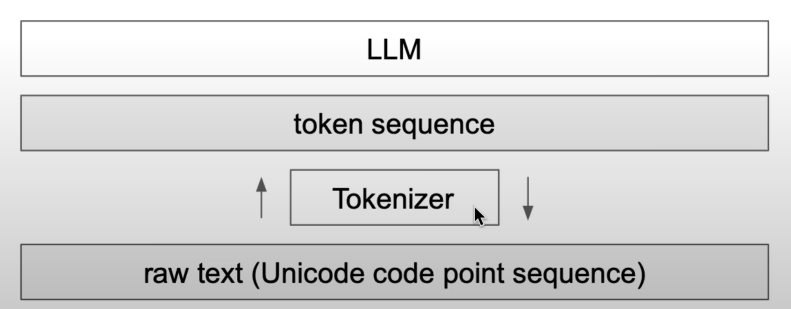
* Tokenizer is completely separate, independent module from the LLM.

##### decoding - Given a sequence of integers in the range [0, vocab_size], what is the text?

In [11]:
vocab = {idx: bytes([idx]) for idx in range(256)}
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

def decode(ids):
    tokens = b"".join(vocab[idx] for idx in ids)
    text = tokens.decode("utf-8", errors='replace')
    return text

print(decode([128]))
    

ÔøΩ


### encode
raw text - tokens

In [14]:
def encode(text):
    tokens = list(text.encode('utf-8'))
    while len(tokens) >= 2:
        stats = get_stats(tokens)
        pair = min(stats, key = lambda p:merges.get(p, float("inf")))
        if pair not in merges:
            break
        idx = merges[pair]
        tokens = merge(tokens, pair, idx)
    return tokens

print(encode(""))

[]


In [15]:
print(decode(encode("hello world")))

hello world


In [16]:
text2 = decode(encode(text))   
print(text2 == text)  

True


### Forced splits using Regex patterns (ref from GPT2 paper)

In [18]:
import regex as re                           #"Space" letter  #"Space" Number
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "Hello've world123 how's are you!!!?"))

['Hello', "'ve", ' world', '123', ' how', "'s", ' are', ' you', '!!!?']


In [19]:
example = """
for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
"""
print(re.findall(gpt2pat, example))

['\n', 'for', ' i', ' in', ' range', '(', '1', ',', ' 101', '):', '\n   ', ' if', ' i', ' %', ' 3', ' ==', ' 0', ' and', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'FizzBuzz', '")', '\n   ', ' elif', ' i', ' %', ' 3', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Fizz', '")', '\n   ', ' elif', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Buzz', '")', '\n   ', ' else', ':', '\n       ', ' print', '(', 'i', ')', '\n']


In [20]:
import tiktoken

# GPT-2 (does not merge spaces)
enc = tiktoken.get_encoding("gpt2")
print(enc.encode("    hello world!!!"))

# GPT-4 (merges spaces)
enc = tiktoken.get_encoding("cl100k_base")
print(enc.encode("    hello world!!!"))

[220, 220, 220, 23748, 995, 10185]
[262, 24748, 1917, 12340]


* SMall pattern change in regex in gpt4 tokenizer : 
* Only three digit numbers are grouped

## Special tokens
1. GPT2 encoder tokens = 50257 (256 raw byte tokens, 50000 merges, +1 special token '<|endoftext|>')

### Sentence piece - Llama